<font face="Arial" size="8" color="black">
    Dynamic Pricing Model (Stochasticity) <br><br>May 1, 2019
</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def get_exp_distribution(mbt = 7, size = 10_000):
    """
    returns days, probs
    """
    
    np.random.seed(1)
    bookings = np.random.exponential(mbt, size)
    probs, days = np.histogram(bookings, bins=int(np.max(bookings//1))+1, density=False)
    probs = probs/size
    days = days[:-1]
    
    return days,probs

# Generate audience behaviors

new mu is 57.36


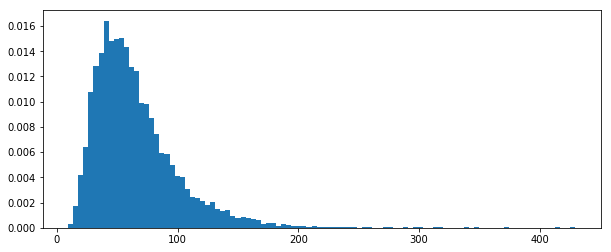

In [2]:
np.random.seed(1)

# Mean Reserve Price (mrp)
mrp = 65

# How intense is the skew of your lognorm distribution?
volatility = 0.50

# How big do you want your population?
size = 10_000

# Get mu – the alterred mrp equivelant to sigma in the following equation:
mu = np.log(mrp) - (0.5*volatility**2)
print(f'new mu is {round(np.e**mu,2)}')
audience = np.random.lognormal(mu, volatility, size)
# Max price – anyone willing to pay higher than this price is replaced with the max price
max_p = 4*mrp

plt.figure(figsize=(10,4))
plt.hist(audience, bins=100, density=True)
plt.show()

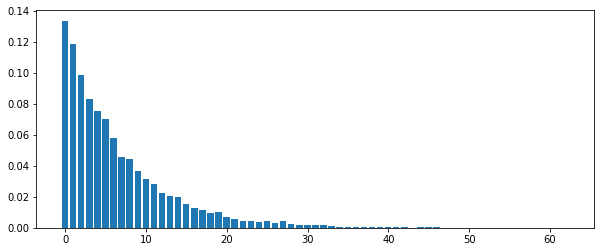

In [24]:
days, probs  = get_exp_distribution(mbt=7)

plt.figure(figsize=(10,4))
plt.bar(days, probs)


plt.show()

In [4]:
print(f'mrp = {round(audience.mean(),2)}')
print(f'mbt = {round(bookings.mean(),2)}')

mrp = 65.34
mbt = 6.92


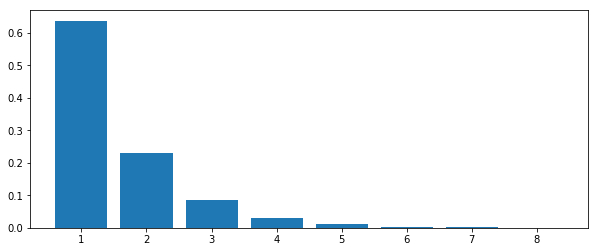

In [5]:
bookings_w = ((bookings//7))+1

probs, weeks = np.histogram(bookings_w, bins=len(np.unique(bookings_w))-1, density=False)
probs = probs/size

plt.figure(figsize=(10,4))
plt.bar(weeks[:-1], probs)
plt.show()

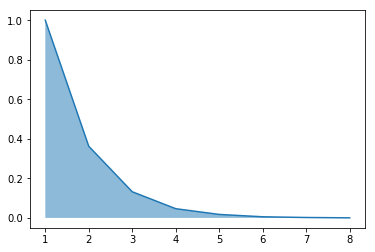

In [6]:
cum_sum_probs = np.cumsum(probs[::-1])[::-1]
plt.plot(weeks[:-1], cum_sum_probs)
plt.fill_between(weeks[:-1], 0, cum_sum_probs, alpha=0.5)
plt.show()

# Simulate Purchasing Behavior

In [7]:
np.unique(bookings_w)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [8]:
days = [int(i) for i in np.unique(bookings)]
weeks_range = [i for i in np.unique(bookings_w)][:-1][::-1]

## First with weeks

In [9]:
weeks_act_prob = dict([(w,p) for w,p in zip(weeks[:-1], probs)])
weeks_range = [x for x in weeks_act_prob.keys()][::-1]
# weeks_cum_prob = dict([(w,p) for w,p in zip(weeks[:-1], cum_sum_probs)])

In [10]:
n_cust_curr = 0

stoch_per_week = []
demand_per_wk_rel = []
demand_per_wk_stoch = []

stoch = 0

for week in weeks_range:
    n_potential = 1
    demand_rel = weeks_act_prob[week]*n_potential
    
    # how many customers?
    n_cust_curr += demand_rel
    
    # create stochasticity
    stoch = (n_cust_curr)**2
    stoch_per_week.append(stoch)
    
    # append demands
    demand_per_wk_rel.append(demand_rel)
    demand_per_wk_stoch.append(demand_rel*(1+stoch))


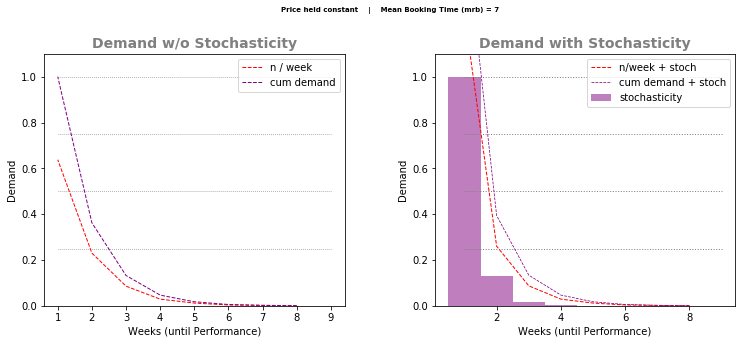

In [11]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)

# ------------------------

ax1.plot(weeks_range, demand_per_wk_rel, c='r', linestyle ='--', linewidth = 1, label = 'n / week')

ax1.plot(weeks_range, np.cumsum(demand_per_wk_rel), c='purple', linestyle ='--',linewidth = 1, label = 'cum demand')
ax1.set_ylim(0,1.1)
ax1.hlines([0.25,0.50,0.75,1],1,9, linewidth=0.75, linestyle=':', color='grey')

ax1.set_title('Demand w/o Stochasticity', size = 14, color= 'grey', weight = 'heavy')
ax1.legend()
ax1.set_xlabel('Weeks (until Performance)')
ax1.set_ylabel('Demand')
# ------------------------

ax2 = fig.add_subplot(1,2,2)
ax2.plot(weeks_range, demand_per_wk_stoch, c='r', linestyle ='--', linewidth = 1, label = 'n/week + stoch')
ax2.plot(weeks_range, np.cumsum(demand_per_wk_stoch), c='purple', linestyle ='--',
         linewidth = 0.75, label = 'cum demand + stoch')

ax2.bar(weeks_range,stoch_per_week, width=1, color = 'purple', alpha = 0.5, label = 'stochasticity')

ax2.set_ylim(0,1.1)
ax2.hlines([0.25,0.50,0.75,1],1,9, linewidth=1, linestyle=':', color='grey')

ax2.set_title('Demand with Stochasticity', size = 14, color= 'grey', weight = 'heavy')
ax2.legend()
ax2.set_xlabel('Weeks (until Performance)')
ax2.set_ylabel('Demand')


# ------------------------

title_save ='demand for bookings w stoch'

plt.suptitle(f'Price held constant    |    Mean Booking Time (mrb) = {mbt}', size = 7, color= 'black', weight='heavy')

plt.subplots_adjust(top=0.85, bottom = 0.15, wspace=0.30, left=0.10, right=0.90)
# plt.savefig(os.path.join(f'Mbt {mbt}', title_save +'.png'), dpi = 150)
plt.show()

In [12]:
# flatten = lambda l: [item for sublist in l for item in sublist]
# weeks_range_n = flatten([(x,x-0.5) for x in weeks_range])


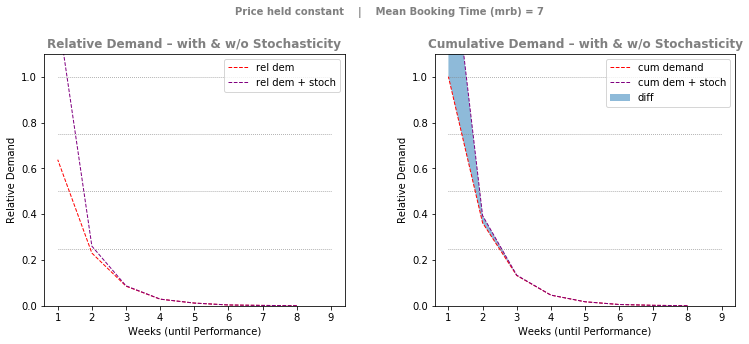

In [13]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)

# ------------------------

ax1.plot(weeks_range, demand_per_wk_rel, c='r', linestyle ='--', linewidth = 1, label = 'rel dem')
ax1.plot(weeks_range, demand_per_wk_stoch, c='purple', linestyle ='--', linewidth = 1, label = 'rel dem + stoch')

# ax1.plot(weeks_range, np.cumsum(demand_per_wk_rel), c='purple', linestyle ='--',linewidth = 1, label = 'cum demand')
ax1.set_ylim(0,1.1)
ax1.hlines([0.25,0.50,0.75,1],1,9, linewidth=0.75, linestyle=':', color='grey')

ax1.set_title('Relative Demand – with & w/o Stochasticity', size = 12, color= 'grey', weight = 'heavy')
ax1.legend()
ax1.set_xlabel('Weeks (until Performance)')
ax1.set_ylabel('Relative Demand')

# ------------------------

ax2 = fig.add_subplot(1,2,2)
ax2.plot(weeks_range, np.cumsum(demand_per_wk_rel), c='r', linestyle ='--', linewidth = 1, label = 'cum demand')
ax2.plot(weeks_range, np.cumsum(demand_per_wk_stoch), c='purple', linestyle ='--', linewidth = 1, label = 'cum dem + stoch')

ax2.fill_between(weeks_range, np.cumsum(demand_per_wk_rel), np.cumsum(demand_per_wk_stoch) ,alpha = 0.5, label='diff')

ax2.set_ylim(0,1.1)
ax2.hlines([0.25,0.50,0.75,1],1,9, linewidth=0.75, linestyle=':', color='grey')

ax2.set_title('Cumulative Demand – with & w/o Stochasticity', size = 12, color= 'grey', weight = 'heavy')
ax2.set_xlabel('Weeks (until Performance)')
ax2.set_ylabel('Relative Demand')
ax2.legend()

# ------------------------

title_save ='demand for bookings w stoch (neater)'

plt.suptitle(f'Price held constant    |    Mean Booking Time (mrb) = {mbt}', size = 10, color= 'grey', weight='heavy')

plt.subplots_adjust(top=0.85, bottom = 0.15, wspace=0.30, left=0.10, right=0.90)
# plt.savefig(os.path.join(f'Mbt {mbt}', title_save +'.png'), dpi = 150)
plt.show()

## Now for days

### Generate Audience

In [45]:
days, probs  = get_exp_distribution(mbt=7)
days_prob = dict([(int(d),p) for d,p in zip(days, probs)])
days_range = [i for i in days_prob.keys()][::-1]

### Generate Demand

In [55]:
n_cust_curr = 0

stoch_per_d = []
demand_per_d_rel = []
demand_per_d_stoch = []

stoch = 0

for day in days_range:
    n_potential = 1
    demand_rel = days_prob[day]*n_potential
    
    # how many customers?
    n_cust_curr += demand_rel
    # create stochasticity
    stoch = (n_cust_curr)**2
    stoch_per_d.append(stoch)
    
    # append demands
    demand_per_d_rel.append(demand_rel)
    demand_per_d_stoch.append(demand_rel*(1+stoch))


### Visualize

    stoch_per_d
    demand_per_d_rel
    demand_per_d_stoch

In [47]:
import pandas as pd
values_dict = [{'Stochasticity':s,'Demand':d,'Demand_Stoch': d_s} for s,d,d_s in zip(stoch_per_d,demand_per_d_rel, demand_per_d_stoch)]
values_df = pd.DataFrame(values_dict[::-1])
values_df.index.name='Days'
values_df['Cum_Demand'] = values_df['Demand'][::-1].cumsum()
values_df['Cum_Demand_Stoch'] = values_df['Demand_Stoch'][::-1].cumsum()
values_df.head(5)

,Demand,Demand_Stoch,Stochasticity,Cum_Demand,Cum_Demand_Stoch
Days,,,,,
0,0.1186,0.207627,0.750649,0.8664,1.115092
1,0.0983,0.153270,0.559205,0.7478,0.907465
2,0.0833,0.118440,0.421850,0.6495,0.754195
3,0.0752,0.099308,0.320582,0.5662,0.635755
4,0.0703,0.087248,0.241081,0.4910,0.536448


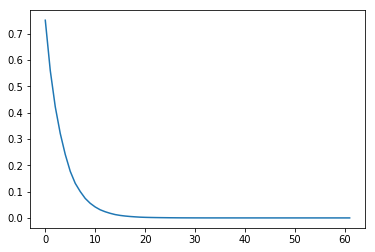

In [48]:
plt.plot(values_df.Stochasticity)
plt.show()

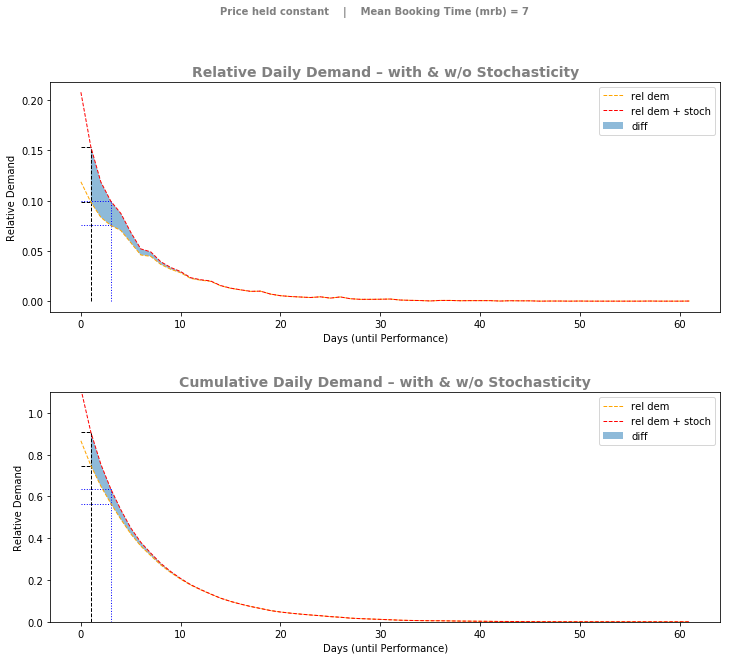

In [18]:
fig = plt.figure(figsize=(12,10))

# ------------------------

ax1 = fig.add_subplot(2,1,1)

# ------------------------

ax1.plot(values_df.Demand, c='orange', linestyle ='--', linewidth = 1, label = 'rel dem')
ax1.plot(values_df.Demand_Stoch, c='red', linestyle ='--', linewidth = 1, label = 'rel dem + stoch')
ax1.fill_between(values_df.index, values_df.Demand, values_df.Demand_Stoch ,
                 where=values_df.index>0,alpha = 0.5, label='diff')

# -  -  -  -  -  -  -  -
ax1.legend()
# -  -  -  -  -  -  -  -

ax1.vlines([1,3],ymin=0,ymax=values_df.Demand_Stoch[1:4:2], linewidth=1, linestyle=['--',':'], color=['black','blue'])
ax1.hlines(values_df.Demand[1:4:2],xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'], color=['black','blue'])
ax1.hlines(values_df.Demand_Stoch[1:4:2],xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'], color=['black','blue'])


# -  -  -  -  -  -  -  -
ax1.set_title('Relative Daily Demand – with & w/o Stochasticity', size = 14, color= 'grey', weight = 'heavy')
ax1.set_xlabel('Days (until Performance)')
ax1.set_ylabel('Relative Demand')

# ------------------------

ax2 = fig.add_subplot(2,1,2)

# ------------------------

ax2.plot(values_df.Cum_Demand, c='orange', linestyle ='--', linewidth = 1, label = 'rel dem')
ax2.plot(values_df.Cum_Demand_Stoch, c='red', linestyle ='--', linewidth = 1, label = 'rel dem + stoch')

ax2.fill_between(values_df.index, values_df.Cum_Demand, values_df.Cum_Demand_Stoch ,
                 where=values_df.index>0,alpha = 0.5, label='diff')

# -  -  -  -  -  -  -  -
ax2.legend()
# -  -  -  -  -  -  -  -

ax2.set_ylim(0,1.1)
ax2.vlines([1,3],ymin=0, ymax= values_df.Cum_Demand_Stoch[1:4:2], linewidth=1, linestyle=['--',':'], color=['black','blue'])
ax2.hlines(values_df.Cum_Demand[1:4:2], xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'],color=['black','blue'])
ax2.hlines(values_df.Cum_Demand_Stoch[1:4:2], xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'],color=['black','blue'])

# -  -  -  -  -  -  -  -
ax2.set_title('Cumulative Daily Demand – with & w/o Stochasticity', size = 14, color= 'grey', weight = 'heavy')
ax2.set_xlabel('Days (until Performance)')
ax2.set_ylabel('Relative Demand')


# ------------------------
plt.suptitle(f'Price held constant    |    Mean Booking Time (mrb) = {mbt}', size = 10, color= 'grey', weight='heavy')
plt.subplots_adjust(top=0.875, bottom =0.125, hspace = 0.35)

# ------------------------
title_save ='demand for bookings w stoch (neater)'
os.makedirs(os.path.join('..output', f'Mbt {mbt}'),exist_ok=True)
image_path = os.path.join('..output', f'Mbt {mbt}', title_save +'.png')

# ------------------------
# plt.savefig(image_path, dpi = 150)
plt.show()


# What if you give away free tickets?

In [56]:
days, probs  = get_exp_distribution(mbt=7)
days_prob = dict([(int(d),p) for d,p in zip(days, probs)])
days_range = [i for i in days_prob.keys()][::-1]

In [71]:
n_cust_curr = .1

stoch_per_d = []
demand_per_d_rel = []
demand_per_d_stoch = []

stoch = 0

for day in days_range:
    n_potential = 1
    demand_rel = days_prob[day]*n_potential
    
    # how many customers?
    n_cust_curr += demand_rel
    
    # create stochasticity
    stoch = (n_cust_curr)**2
    stoch_per_d.append(stoch)
    
    # append demands
    demand_per_d_rel.append(demand_rel)
    demand_per_d_stoch.append(demand_rel*(1+stoch))


In [72]:
import pandas as pd
values_dict = [{'Stochasticity':s,'Demand':d,'Demand_Stoch': d_s} for s,d,d_s in zip(stoch_per_d,demand_per_d_rel, demand_per_d_stoch)]
values_df = pd.DataFrame(values_dict[::-1])
values_df.index.name='Days'
values_df['Cum_Demand'] = values_df['Demand'][::-1].cumsum()
values_df['Cum_Demand_Stoch'] = values_df['Demand_Stoch'][::-1].cumsum()
values_df.head(5)

,Demand,Demand_Stoch,Stochasticity,Cum_Demand,Cum_Demand_Stoch
Days,,,,,
0,0.1186,0.229364,0.933929,0.8664,1.204232
1,0.0983,0.168955,0.718765,0.7478,0.974868
2,0.0833,0.130094,0.561750,0.6495,0.805913
3,0.0752,0.108575,0.443822,0.5662,0.675819
4,0.0703,0.094854,0.349281,0.4910,0.567244


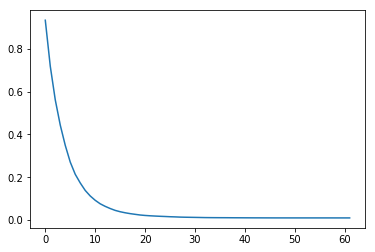

In [73]:
plt.plot(values_df.Stochasticity)
plt.show()

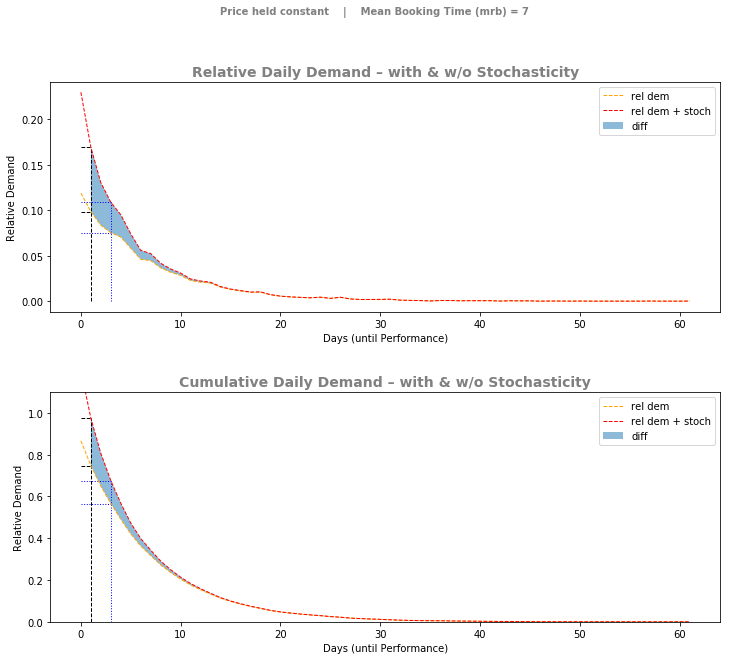

In [74]:
fig = plt.figure(figsize=(12,10))

# ------------------------

ax1 = fig.add_subplot(2,1,1)

# ------------------------

ax1.plot(values_df.Demand, c='orange', linestyle ='--', linewidth = 1, label = 'rel dem')
ax1.plot(values_df.Demand_Stoch, c='red', linestyle ='--', linewidth = 1, label = 'rel dem + stoch')
ax1.fill_between(values_df.index, values_df.Demand, values_df.Demand_Stoch ,
                 where=values_df.index>0,alpha = 0.5, label='diff')

# -  -  -  -  -  -  -  -
ax1.legend()
# -  -  -  -  -  -  -  -

ax1.vlines([1,3],ymin=0,ymax=values_df.Demand_Stoch[1:4:2], linewidth=1, linestyle=['--',':'], color=['black','blue'])
ax1.hlines(values_df.Demand[1:4:2],xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'], color=['black','blue'])
ax1.hlines(values_df.Demand_Stoch[1:4:2],xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'], color=['black','blue'])


# -  -  -  -  -  -  -  -
ax1.set_title('Relative Daily Demand – with & w/o Stochasticity', size = 14, color= 'grey', weight = 'heavy')
ax1.set_xlabel('Days (until Performance)')
ax1.set_ylabel('Relative Demand')

# ------------------------

ax2 = fig.add_subplot(2,1,2)

# ------------------------

ax2.plot(values_df.Cum_Demand, c='orange', linestyle ='--', linewidth = 1, label = 'rel dem')
ax2.plot(values_df.Cum_Demand_Stoch, c='red', linestyle ='--', linewidth = 1, label = 'rel dem + stoch')

ax2.fill_between(values_df.index, values_df.Cum_Demand, values_df.Cum_Demand_Stoch ,
                 where=values_df.index>0,alpha = 0.5, label='diff')

# -  -  -  -  -  -  -  -
ax2.legend()
# -  -  -  -  -  -  -  -

ax2.set_ylim(0,1.1)
ax2.vlines([1,3],ymin=0, ymax= values_df.Cum_Demand_Stoch[1:4:2], linewidth=1, linestyle=['--',':'], color=['black','blue'])
ax2.hlines(values_df.Cum_Demand[1:4:2], xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'],color=['black','blue'])
ax2.hlines(values_df.Cum_Demand_Stoch[1:4:2], xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'],color=['black','blue'])

# -  -  -  -  -  -  -  -
ax2.set_title('Cumulative Daily Demand – with & w/o Stochasticity', size = 14, color= 'grey', weight = 'heavy')
ax2.set_xlabel('Days (until Performance)')
ax2.set_ylabel('Relative Demand')


# ------------------------
plt.suptitle(f'Price held constant    |    Mean Booking Time (mrb) = {mbt}', size = 10, color= 'grey', weight='heavy')
plt.subplots_adjust(top=0.875, bottom =0.125, hspace = 0.35)

# ------------------------
title_save ='demand for bookings w stoch (neater)'
os.makedirs(os.path.join('..output', f'Mbt {mbt}'),exist_ok=True)
image_path = os.path.join('..output', f'Mbt {mbt}', title_save +'.png')

# ------------------------
# plt.savefig(image_path, dpi = 150)
plt.show()


In [107]:
def plot_demands(df_use=values_df, col_1='Demand',col_2='Demand_Stoch'):
    fig = plt.figure(figsize=(10,4))

    # ------------------------

    ax1 = fig.add_subplot(1,1,1)

    # ------------------------

    ax1.plot(df_use[col_1], c='orange', linestyle ='--', linewidth = 1, label = 'rel dem')
    ax1.plot(df_use[col_2], c='red', linestyle ='--', linewidth = 1, label = 'rel dem + stoch')
    ax1.fill_between(df_use.index, df_use[col_1], df_use[col_2] ,
                     where=df_use.index>0,alpha = 0.5, label='diff')

    # -  -  -  -  -  -  -  -
    ax1.legend()
    # -  -  -  -  -  -  -  -

    ax1.vlines([1,3],ymin=0,ymax=df_use[col_2][1:4:2], linewidth=1, linestyle=['--',':'], color=['black','blue'])
    ax1.hlines(df_use[col_1][1:4:2],xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'], color=['black','blue'])
    ax1.hlines(df_use[col_2][1:4:2],xmin=0,xmax=[1,3], linewidth=1, linestyle=['--',':'], color=['black','blue'])


    # -  -  -  -  -  -  -  -
    ax1.set_title(f'Relative {col_1} and {col_2}',size = 14, color= 'grey', weight = 'heavy')
    ax1.set_xlabel('Days (until Performance)')
    ax1.set_ylabel('Demand')


    # ------------------------
    title_save ='demand for bookings w stoch (neater)'
    os.makedirs(os.path.join('..output', f'Mbt {mbt}'),exist_ok=True)
    image_path = os.path.join('..output', f'Mbt {mbt}', title_save +'.png')

    # ------------------------
    # plt.savefig(image_path, dpi = 150)
    plt.show()


# Optimize

## Get Demands

In [ ]:
days, probs  = get_exp_distribution(mbt=7)
days_prob = dict([(int(d),p) for d,p in zip(days, probs)])
days_range = [i for i in days_prob.keys()][::-1]

In [339]:
cum_demands = []
cols_x =[]

for x in [0,0.05,0.1,0.2,0.3, 0.5]:
    values = []

    n_cust_curr = n_begin = x

    stoch = 0

    for day in days_range:
        n_potential = 1
        demand_rel = days_prob[day]*n_potential

        # how many customers?
        n_cust_curr += demand_rel

        # create stochasticity
        stoch = (n_cust_curr)**2

        values.append({
            'Day':day,
            'Stochasticity': stoch,
            'Demand': demand_rel,
            'Demand_Stoch': demand_rel*(1+stoch)
            })

    values_df = pd.DataFrame(values[::-1])
    values_df.set_index('Day', inplace=True)
    values_df.sort_index(inplace=True)
    values_df['Cum_Demand'] = values_df['Demand'][::-1].cumsum()
    values_df['Cum_Demand_Stoch'] = values_df['Demand_Stoch'][::-1].cumsum()
#     print(values_df.head(2))
#     print('\n')
#     print(f'When n customers starts at: {n_begin}')
#     print('Diff in demand: ', round(values_df['Demand_Stoch'][0] - values_df['Demand'][0],2))
#     print('Diff in cum demand: ', round(values_df['Cum_Demand_Stoch'][0] - values_df['Cum_Demand'][0],2))

#     plot_demands(values_df, 'Demand','Demand_Stoch')
#     plot_demands(values_df, 'Cum_Demand','Cum_Demand_Stoch')
    
    # update your dict
    
    cols_x.append(f'Cum_Demand_Stoch_at_{x}')
    cum_demands.append(values_df.Cum_Demand_Stoch)
    
cum_demands.append(values_df.Cum_Demand)
cols_x.append('Cum_Demand (No Stoch)')

In [284]:
df_simulation = pd.concat(cum_demands,axis=1)
df_simulation.columns = cols_x
df_simulation = df_simulation = df_simulation.reindex(sorted(df_simulation.columns), axis=1)
df_simulation.index = df_simulation.index+1
df_simulation.head(5)

,Cum_Demand (No Stoch),Cum_Demand_Stoch_at_0,Cum_Demand_Stoch_at_0.05,Cum_Demand_Stoch_at_0.1,Cum_Demand_Stoch_at_0.2,Cum_Demand_Stoch_at_0.3,Cum_Demand_Stoch_at_0.5
Day,,,,,,,
1,0.8664,1.115092,1.157496,1.204232,1.310699,1.434495,1.734070
2,0.7478,0.907465,0.939297,0.974868,1.057226,1.154541,1.394038
3,0.6495,0.754195,0.778431,0.805913,0.870621,0.948319,1.142684
4,0.5662,0.635755,0.654372,0.675819,0.727207,0.789920,0.949316
5,0.4910,0.536448,0.550618,0.567244,0.607860,0.658297,0.788630


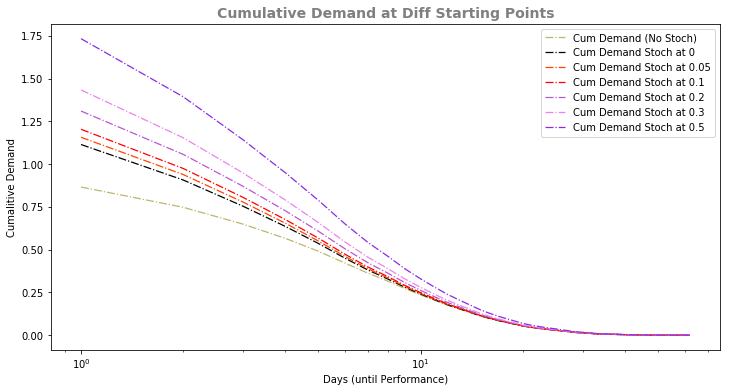

In [340]:
def plot_demands_simulate(df_use=df_simulation):
    fig = plt.figure(figsize=(12,6))

    colors = ['darkkhaki','black','orangered','red','MediumOrchid','violet','blueviolet']
    # ------------------------

    ax1 = fig.add_subplot(1,1,1)

    # ------------------------
    i=0
    for col in df_use:
        ax1.plot(df_use[col], linestyle ='-.', linewidth = 1.25, color = colors[i], label = ' '.join(col.split('_')))
        i+=1
    ax1.legend()
    
    # -  -  -  -  -  -  -  -
    ax1.set_title(f'Cumulative Demand at Diff Starting Points',size = 14, color= 'grey', weight = 'heavy')
    ax1.set_xlabel('Days (until Performance)')
    ax1.set_ylabel('Cumalitive Demand')

    ax1.set_xscale('log')

    # ------------------------
    title_save ='cum demand when give free seats'
    os.makedirs(os.path.join('..output', f'Mbt {mbt}'),exist_ok=True)
    image_path = os.path.join('..output', f'Mbt {mbt}', title_save +'.png')


    plt.savefig(image_path, dpi = 150)
    plt.show()

    
plot_demands_simulate(df_simulation)

## Adjust Demands

In [295]:
df_simulation.head(5)

,Cum_Demand (No Stoch),Cum_Demand_Stoch_at_0,Cum_Demand_Stoch_at_0.05,Cum_Demand_Stoch_at_0.1,Cum_Demand_Stoch_at_0.2,Cum_Demand_Stoch_at_0.3,Cum_Demand_Stoch_at_0.5
Day,,,,,,,
1,0.8664,1.115092,1.157496,1.204232,1.310699,1.434495,1.734070
2,0.7478,0.907465,0.939297,0.974868,1.057226,1.154541,1.394038
3,0.6495,0.754195,0.778431,0.805913,0.870621,0.948319,1.142684
4,0.5662,0.635755,0.654372,0.675819,0.727207,0.789920,0.949316
5,0.4910,0.536448,0.550618,0.567244,0.607860,0.658297,0.788630


In [345]:
for col in df_simulation:
    print(f'{col}:\t{df_simulation[col][1]}')
    
    if '0' in col:
        diff = float(col.split('_')[-1])
        print(f'Adjusted:\t\t\t{df_simulation[col][1] - diff}')
        
        if df_simulation[col][1] - diff > df_simulation.Cum_Demand_Stoch_at_0[1]:
            print('Beat Stoch at Normal?\t\t*YES*')
        else:
            print('Beat Stoch at Normal?\t\tNO')
        
    print(5*'......')

Cum_Demand (No Stoch):	0.8664000000000001
..............................
Cum_Demand_Stoch_at_0:	1.115092262671
Adjusted:			1.115092262671
Beat Stoch at Normal?		NO
..............................
Cum_Demand_Stoch_at_0.05:	1.157496005671
Adjusted:			1.107496005671
Beat Stoch at Normal?		NO
..............................
Cum_Demand_Stoch_at_0.1:	1.204231748671
Adjusted:			1.1042317486709998
Beat Stoch at Normal?		NO
..............................
Cum_Demand_Stoch_at_0.2:	1.310699234671
Adjusted:			1.110699234671
Beat Stoch at Normal?		NO
..............................
Cum_Demand_Stoch_at_0.3:	1.4344947206709997
Adjusted:			1.1344947206709997
Beat Stoch at Normal?		*YES*
..............................
Cum_Demand_Stoch_at_0.5:	1.7340696926709998
Adjusted:			1.2340696926709998
Beat Stoch at Normal?		*YES*
..............................
